In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)
img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape1 = (img_rows, img_cols, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Conv2D(75, kernel_size=(5, 5), activation='relu', input_shape=input_shape1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, Y_train, batch_size=150, epochs=10, validation_split=0.2, verbose=2)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))


Epoch 1/10
320/320 - 23s - 71ms/step - accuracy: 0.9274 - loss: 0.2290 - val_accuracy: 0.9829 - val_loss: 0.0560
Epoch 2/10
320/320 - 21s - 65ms/step - accuracy: 0.9809 - loss: 0.0633 - val_accuracy: 0.9843 - val_loss: 0.0504
Epoch 3/10
320/320 - 21s - 65ms/step - accuracy: 0.9860 - loss: 0.0450 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 4/10
320/320 - 21s - 64ms/step - accuracy: 0.9887 - loss: 0.0351 - val_accuracy: 0.9912 - val_loss: 0.0308
Epoch 5/10
320/320 - 21s - 65ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9914 - val_loss: 0.0302
Epoch 6/10
320/320 - 21s - 65ms/step - accuracy: 0.9919 - loss: 0.0253 - val_accuracy: 0.9925 - val_loss: 0.0283
Epoch 7/10
320/320 - 21s - 65ms/step - accuracy: 0.9928 - loss: 0.0215 - val_accuracy: 0.9912 - val_loss: 0.0296
Epoch 8/10
320/320 - 21s - 65ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9916 - val_loss: 0.0280
Epoch 9/10
320/320 - 21s - 64ms/step - accuracy: 0.9938 - loss: 0.0179 - val_accuracy: 0.9912 - 

In [8]:
model_json = model.to_json()
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("mnist_model.weights.h5")
json_file = open("mnist_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("mnist_model.weights.h5")
loaded_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
scores = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("Точность модели на тестовых данных: %.2f%%" % (scores[1]*100))

Точность модели на тестовых данных: 99.38%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[4.9504033e-06 3.5078579e-06 2.4669791e-05 5.5213936e-04 2.5455240e-06
  8.8559260e-05 5.5221175e-05 4.6879841e-06 9.9926203e-01 1.6239803e-06]]
[8]


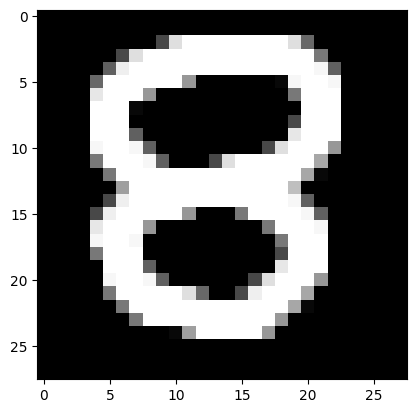

In [15]:
im = Image.open("8.png")
im_grey = im.convert('L')
im_array = np.array(im_grey)
im_array = im_array.reshape(1, img_rows, img_cols, 1)
x = 255 - im_array
x=x.astype('float32')/255
plt.imshow(x.reshape(28,28), cmap='gray')
prediction = loaded_model.predict(x)
print(prediction)
prediction = np.argmax(prediction, axis=1)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[4.2542195e-04 9.5232868e-01 8.7431008e-03 1.8790182e-02 9.8710682e-04
  5.8848537e-03 7.7168932e-03 4.0413211e-03 9.2834875e-04 1.5400433e-04]]
[1]


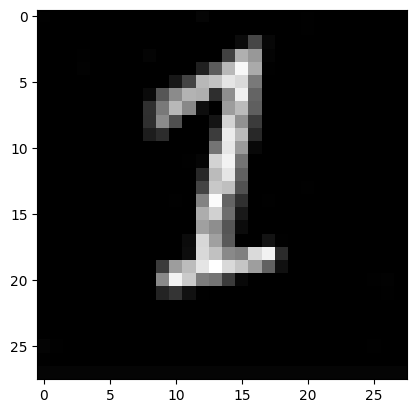

In [16]:
im2 = Image.open("test.jpg")
enhancer = ImageEnhance.Contrast(im2)
im2 = enhancer.enhance(100)
im_grey2 = im2.convert('L')
im_resized=im_grey2.resize((28,28))
im_array2 = np.array(im_resized)
im_array2=np.reshape(im_array2, (1, 28,28,1)).astype('float32')
x2 = 255 - im_array2
x2/=255
plt.imshow(x2.reshape(28,28), cmap='gray')
prediction2 = loaded_model.predict(x2)
print(prediction2)
prediction2 = np.argmax(prediction2, axis=1)
print(prediction2)